# DS 3000 - Assignment [10]

**Student Name**: [Ivan Ng]

**Date**: [3/15/2024]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

load the data directly from the URL into a DataFrame.


In [1]:
#run this cell to install the fast parquet library
!pip install fastparquet

In [2]:
import pandas as pd
#let's load the data into a dataframe

parquet_url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet"
parquet_path = "Downloads/green_tripdata_2023-02.parquet"

tripdata_df = pd.read_parquet(parquet_url,
                      engine = 'fastparquet')

print(tripdata_df)

       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0           1.0  2023-02-01 00:46:22   2023-02-01 01:05:57                  N   
1           2.0  2023-02-01 00:05:09   2023-02-01 00:22:42                  N   
2           2.0  2023-02-01 00:03:47   2023-02-01 00:27:30                  N   
3           2.0  2023-01-31 23:30:56   2023-01-31 23:51:40                  N   
4           2.0  2023-02-01 00:15:05   2023-02-01 00:26:02                  N   
...         ...                  ...                   ...                ...   
64804       2.0  2023-02-28 21:49:00   2023-02-28 22:04:00               None   
64805       2.0  2023-02-28 21:05:00   2023-02-28 21:08:00               None   
64806       2.0  2023-02-28 22:42:00   2023-02-28 22:59:00               None   
64807       2.0  2023-02-28 23:21:00   2023-02-28 23:38:00               None   
64808       2.0  2023-02-28 23:10:00   2023-02-28 23:15:00               None   

       RatecodeID  PULocati

## Question 2: 

Data Prep & EDA


In [3]:
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype(int)
tripdata_df['store_and_fwd_flag'] = tripdata_df['store_and_fwd_flag'].astype(str)
tripdata_df['PULocationID'] = tripdata_df['PULocationID'].astype(int)
tripdata_df['DOLocationID'] = tripdata_df['DOLocationID'].astype(int)
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype(str)

print("Data Types with changes")
print(tripdata_df.dtypes)

Data Types with changes
VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                        object
congestion_surcharge            float64
dtype: object


In [4]:
print("The missing values are a widespread issue as multiple columns have missing data.")
print("ehail_fee which is an empty column making it an isolated case.")
print("However many of the non-nulls stats are the same across multiple columns.")
print("This leads me to suspect that it is an isolated issue by row.")
print("Therefore I recommend trying row removal and removeing the ehail_fee column.")

tripdata_df = tripdata_df.drop(columns=["ehail_fee"])
tripdata_df = tripdata_df.dropna()

print(tripdata_df.info())

The missing values are a widespread issue as multiple columns have missing data.
ehail_fee which is an empty column making it an isolated case.
However many of the non-nulls stats are the same across multiple columns.
This leads me to suspect that it is an isolated issue by row.
Therefore I recommend trying row removal and removeing the ehail_fee column.
<class 'pandas.core.frame.DataFrame'>
Index: 59988 entries, 0 to 59987
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               59988 non-null  int32         
 1   lpep_pickup_datetime   59988 non-null  datetime64[us]
 2   lpep_dropoff_datetime  59988 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           59988 non-null  int32         
 6   DOLocationID           59988 non-null  int32         
 7   pas

In [5]:
print("Had errors coercing the data types of:")
print("RatecodeID")
print("payment_type")
print("passenger_count")
print("as these should be ints")
print("However after removing the null rows causing this issue,")
print("I can fix the variable to be suitable.")

tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype(int)
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype(int)
tripdata_df['passenger_count'] = tripdata_df['passenger_count'].astype(int)

print(tripdata_df.dtypes)

Had errors coercing the data types of:
RatecodeID
payment_type
passenger_count
as these should be ints
However after removing the null rows causing this issue,
I can fix the variable to be suitable.
VendorID                          int32
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                        int32
PULocationID                      int32
DOLocationID                      int32
passenger_count                   int32
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                      int32
trip_type                        object
congestion_surcharge            float64
dtype: object


In [6]:
# Iterate through each column
for col in tripdata_df.select_dtypes(include='float').columns:
    # Remove rows where the number is negative
    tripdata_df = tripdata_df[tripdata_df[col] >= 0]

# Count all negative values in cols
total_neg = 0
for col in tripdata_df.select_dtypes(include='float').columns:
    # Count the number of negative values in the column
    total_neg += (tripdata_df[col] < 0).sum()
    
print(total_neg)

0


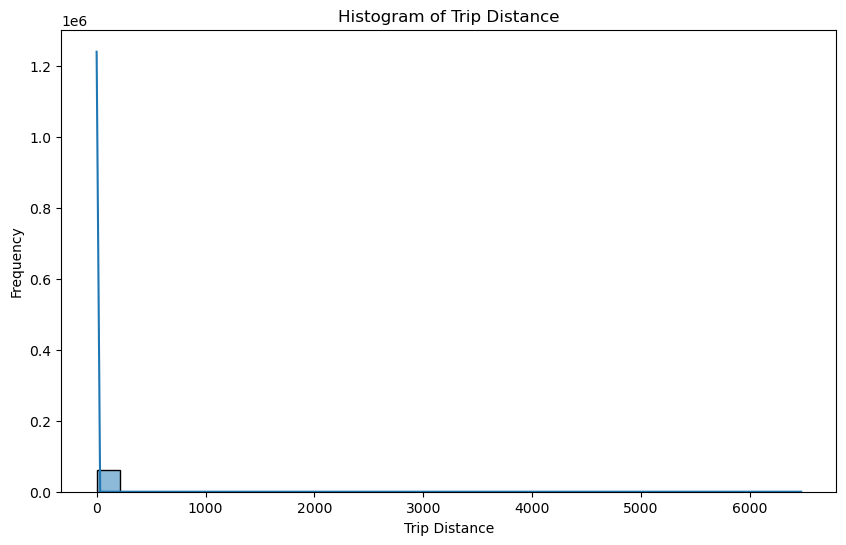

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of trip distance
plt.figure(figsize=(10, 6))
sns.histplot(data=tripdata_df, x='trip_distance', bins=30, kde=True)
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

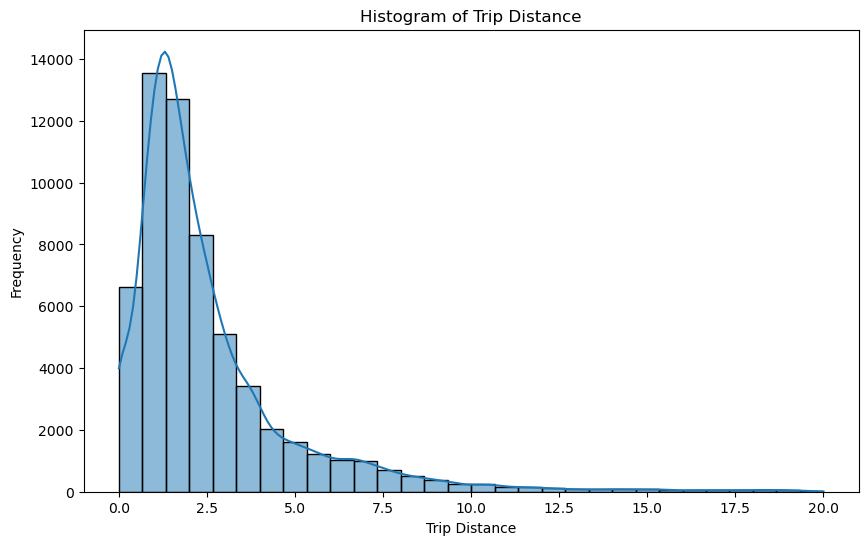

In [8]:
# Remove outliers
tripdata_df = tripdata_df[tripdata_df['trip_distance'] <= 20]

# Plot histogram of trip distance
plt.figure(figsize=(10, 6))
sns.histplot(data=tripdata_df, x='trip_distance', bins=30, kde=True)
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Frequency')
plt.show()

## Question 3: 
Feature Selection


In [9]:
# passenger_count:
# The amount of people in the car will affect how much tip is given to the cab driver.
# trip_distance, fare_amount, extra, mta_tax, tolls_amount, improvement_surcharge, and total_amount: 
# These are all numerical features related to the trip cost and distance, 
# which could have a direct impact on tip amounts.
# congestion_surcharge: 
# This could be relevant if congestion pricing affects trip duration or customer satisfaction

In [10]:
# abstract these columns
fc = tripdata_df[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
                  'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'tip_amount']]

print(fc)

       passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0                    1          10.80         42.9    1.0      1.5   
1                    1           4.76         23.3    1.0      0.5   
2                    1           6.32         30.3    1.0      0.5   
3                    1           3.50         16.3    1.0      0.5   
4                    1           3.14         17.0    1.0      0.5   
...                ...            ...          ...    ...      ...   
59983                1           1.45          9.3    1.0      0.5   
59984                1           0.78          5.8    1.0      0.5   
59985                1           1.50          9.3    1.0      0.5   
59986                1           3.01         17.0    1.0      0.5   
59987                1           1.02          8.0    0.0      0.0   

       tolls_amount  improvement_surcharge  total_amount  \
0               0.0                    1.0         45.40   
1               0.0                    

C:\Users\Ivan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


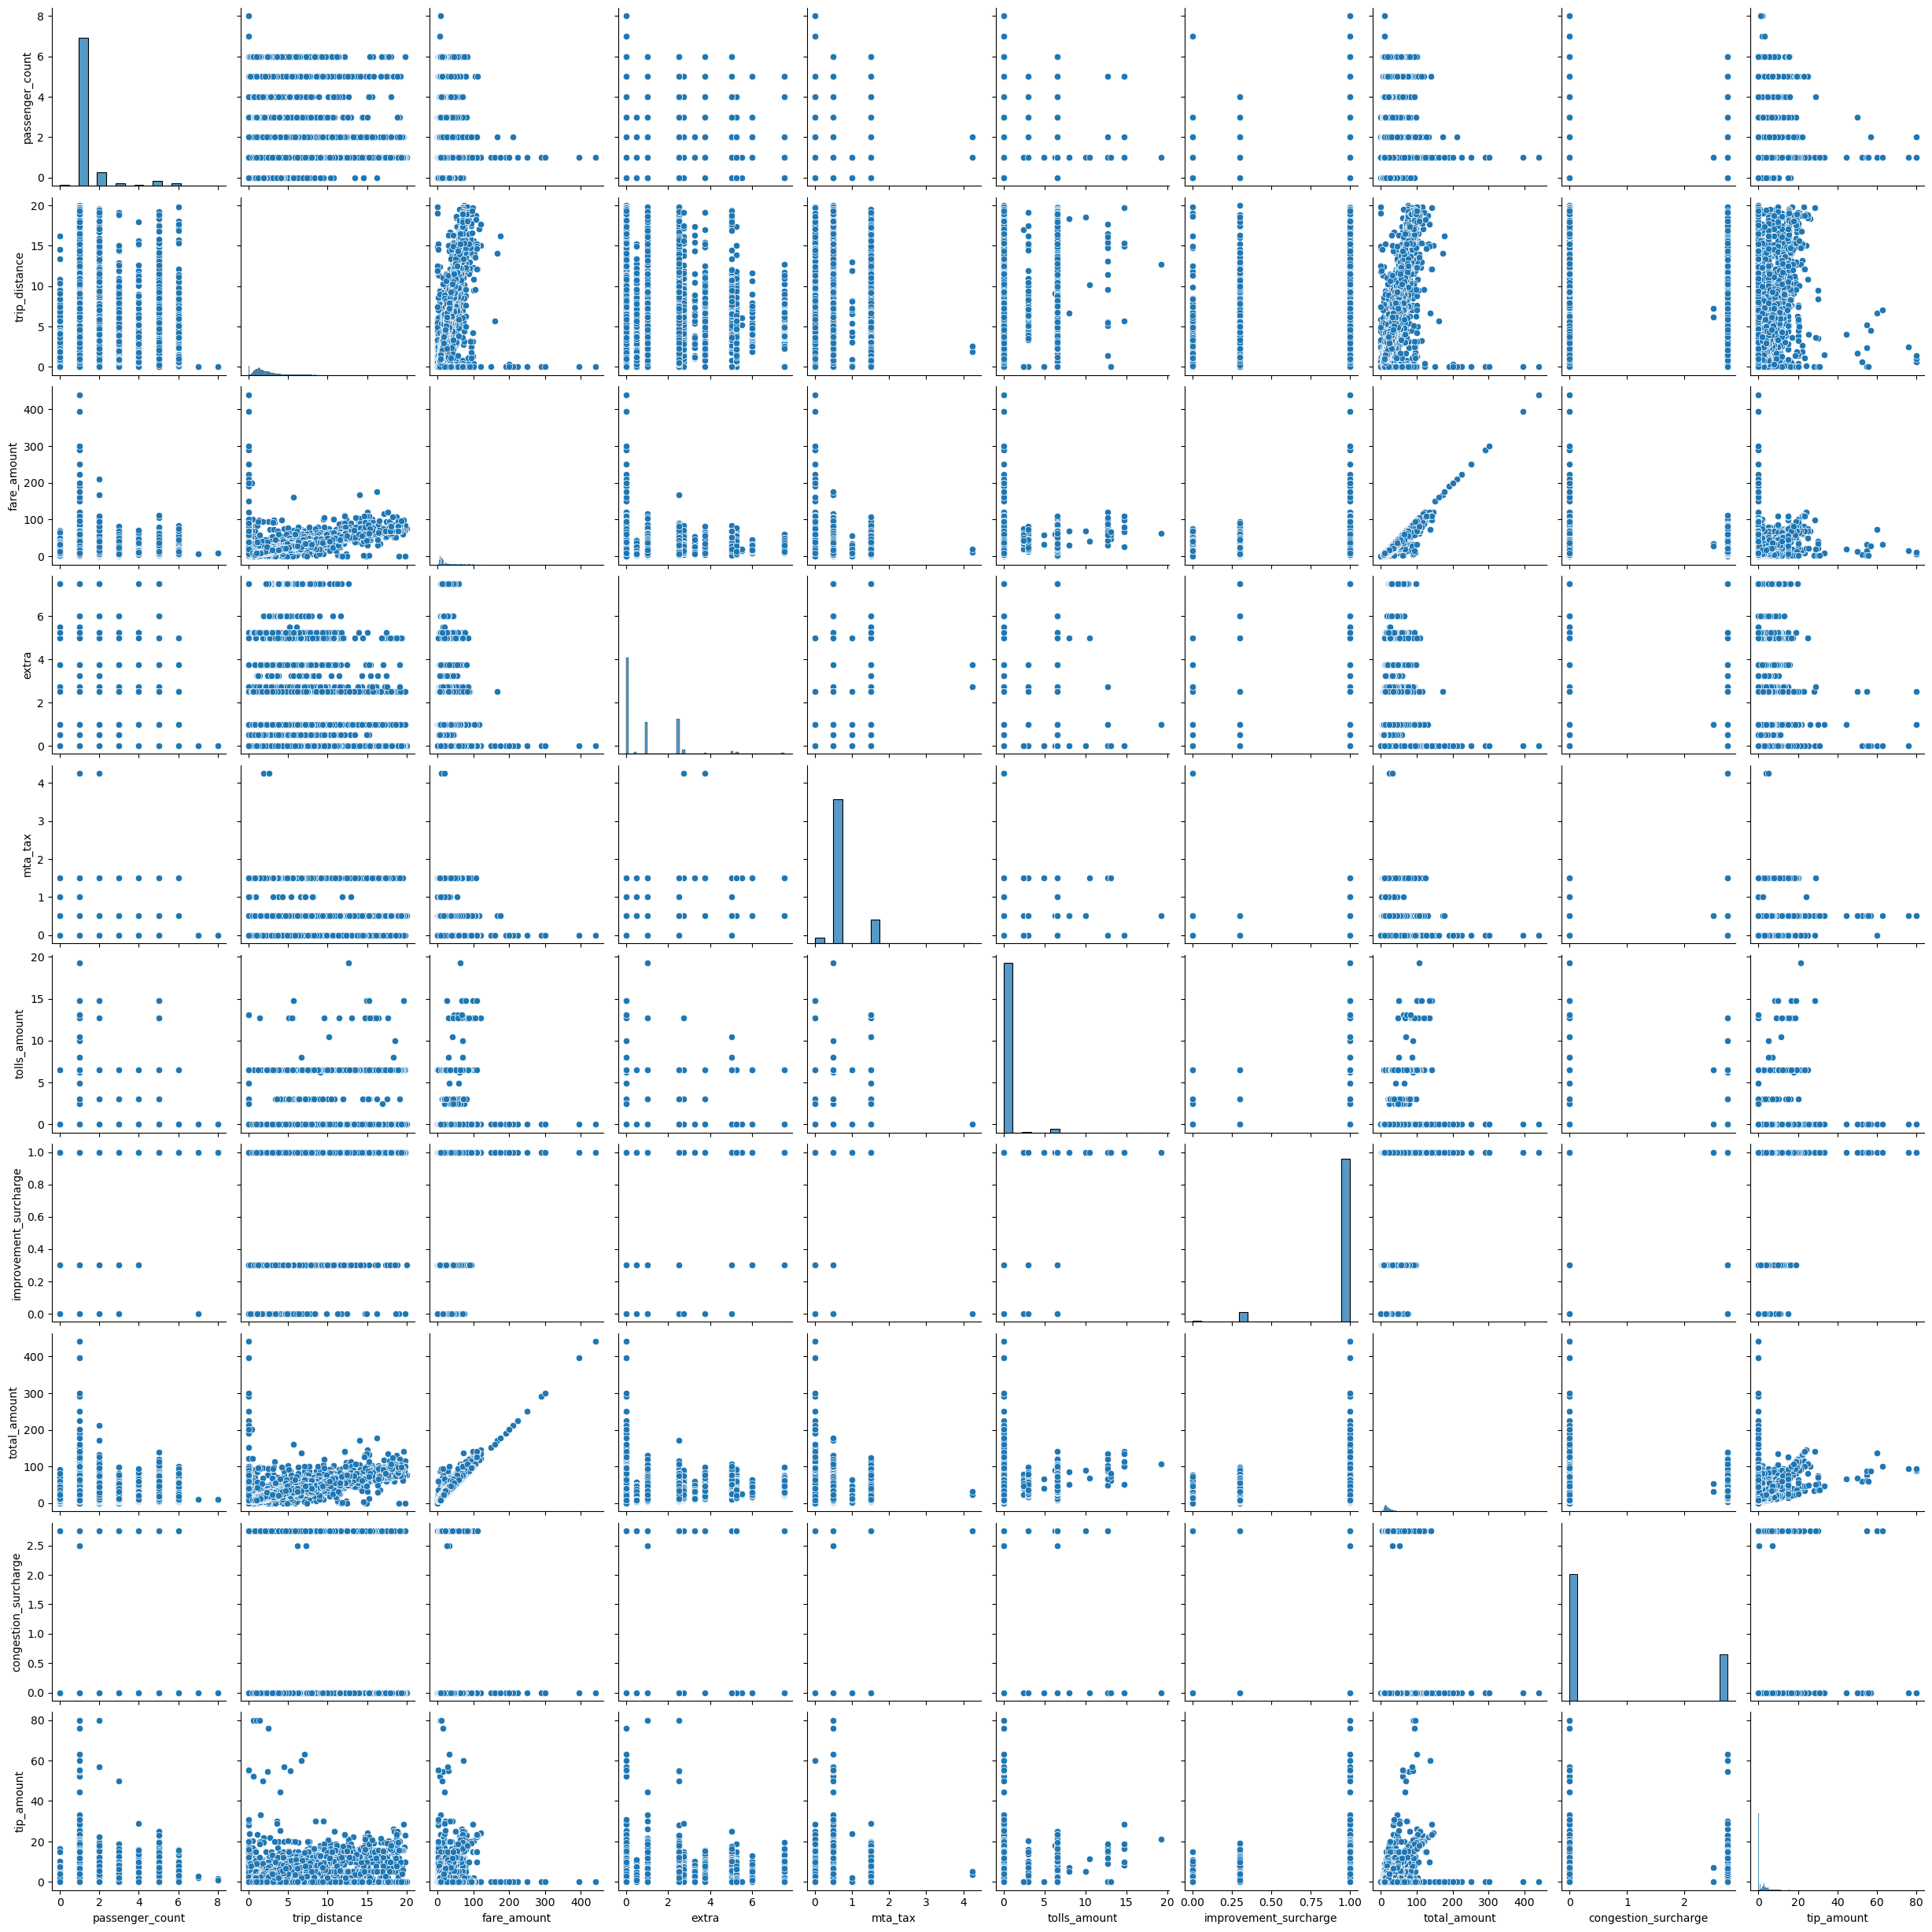

In [11]:
# check the correlations specifically between the features and the tip
sns.pairplot(fc)

## Question 4: 
Data Partitioning


In [13]:
from sklearn.model_selection import train_test_split

# partition the data into train sets no encoded variables
X   = fc[['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount', 
                  'improvement_surcharge', 'total_amount', 'congestion_surcharge']]
y   = fc['tip_amount']

X_train, X_test, y_train, y_test = train_test_split(X,              #the input features
                                                    y,              #the label
                                                    test_size=0.3,  #set aside 30% of the data as the test set
                                                    random_state=7 #reproduce the results
                                                   )

## Question 5: 
Model Development


In [14]:
from sklearn.ensemble import RandomForestRegressor

# build regression forest to predict tip
rf = RandomForestRegressor(random_state=7)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

## Question 6: 
Model Evaluation


In [15]:
#predict the labels for the test set
y_pred   = rf.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error

# evaluate the error of the model
mse = mean_squared_error(y_test, y_pred)

# Round the MSE to two decimals
mse = round(mse, 2)

# Evaluate the Predictions
print('The mse of the model is: {}'.format(mse))

The mse of the model is: 0.32


In [20]:
# An mse of 32 cents is not terrible considering the range and abundance of tips
# ranging from 0 to $8.80. In the face of the tip ranges 32 cents is inconsequential.

## Question 7: 
Model Tuning


In [24]:
best_mse = mse

# Iterate over each value of n_estimators
for n_estimators in range(14, 127, 14):
    # Instantiate the RandomForestRegressor with the current value of n_estimators
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Print MSE for current model
    print(f"Model with n_estimators={n_estimators} - MSE: {mse:.4f}")
    
    # Check if current model has the lowest MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model

# Print the best performing model's parameters and MSE
print("\nBest Performing Model:")
print(best_model)
print("Best MSE:", best_mse)

Model with n_estimators=14 - MSE: 0.3735
Model with n_estimators=28 - MSE: 0.3423
Model with n_estimators=42 - MSE: 0.3294
Model with n_estimators=56 - MSE: 0.3190
Model with n_estimators=70 - MSE: 0.3204
Model with n_estimators=84 - MSE: 0.3156
Model with n_estimators=98 - MSE: 0.3134
Model with n_estimators=112 - MSE: 0.3100
Model with n_estimators=126 - MSE: 0.3108

Best Performing Model:
RandomForestRegressor(n_estimators=112, random_state=42)
Best MSE: 0.31004409551522133


Text(0.5, 1.0, 'Feature Importance')

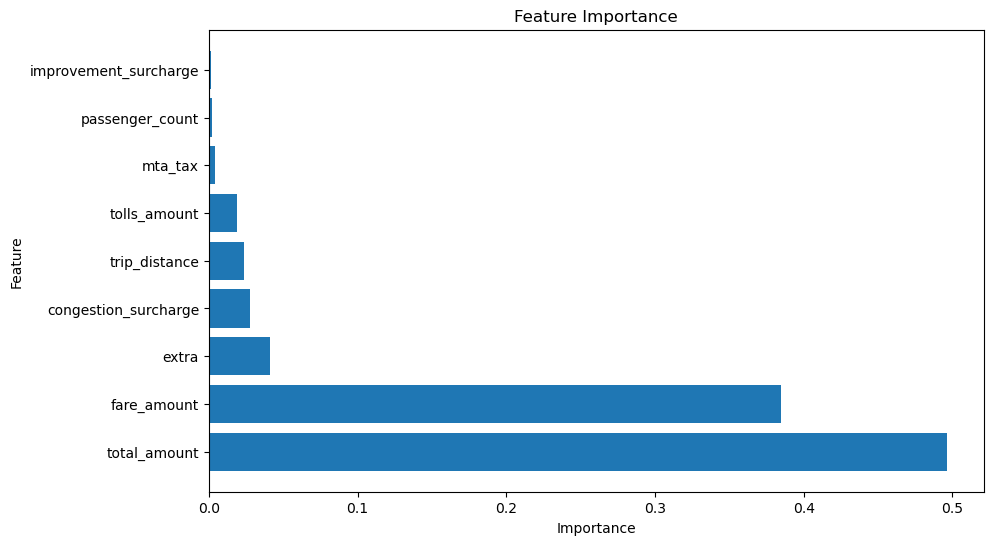

In [25]:
import matplotlib.pyplot as plt

# Get feature importances from the best-performing model
feature_importances = best_model.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Create a DataFrame to store feature importance values with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

In [ ]:
# As aspected, total_amount is of the utmost importance as it comprises all
# the prices will directly correlate.
# Fare_mount as aspected is relatively important because it may react in 
# a manner similar to percentage ripping in a restuarant.
# The other aspects may be of a bit more irrelevant features.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
